<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_7_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis**



##Tahap 1: Persiapan dan Inspeksi Awal
Tujuannya adalah memuat data dan memahami strukturnya secara sekilas.

In [1]:
#Menghubungkan google colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats

In [3]:
#Melakukan pembacaan data
df = pd.read_csv("/content/gdrive/MyDrive/EDA/Praktikum pekan 7/Data/Salary_Data_Tugas EDA.xlsx - Sheet1.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


In [4]:
#Melihat informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6707 non-null   int64  
 1   Gender               6707 non-null   object 
 2   Education Level      6706 non-null   object 
 3   Job Title            6706 non-null   object 
 4   Years of Experience  6705 non-null   float64
 5   Salary               6703 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.5+ KB


In [5]:
#Menampilkan data statistik dengan kode
numerical_df = df.select_dtypes(include=['int64', 'float64'])

#Hitung statistik deskriptif, median, modus, simpangan rata-rata, range, dan variansi
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var

descriptive_stats['median'] = median_values
descriptive_stats['mode'] = mode_values
descriptive_stats['mad'] = mad_values
descriptive_stats['range'] = range_values
descriptive_stats['variance'] = variance_values

print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,Age,Years of Experience,Salary,median,mode,mad,range,variance
count,6707.000000,6705.000000,6703.000000,NaN,NaN,NaN,NaN,<bound method DataFrame.var of Age Year...
mean,33.623677,8.096346,115446.119200,NaN,NaN,NaN,NaN,<bound method DataFrame.var of Age Year...
std,7.621529,6.067248,53881.790154,NaN,NaN,NaN,NaN,<bound method DataFrame.var of Age Year...
min,21.000000,0.000000,350.000000,NaN,NaN,NaN,NaN,<bound method DataFrame.var of Age Year...
25%,28.000000,3.000000,70000.000000,NaN,NaN,NaN,NaN,<bound method DataFrame.var of Age Year...
50%,32.000000,7.000000,115000.000000,NaN,NaN,NaN,NaN,<bound method DataFrame.var of Age Year...
75%,38.000000,12.000000,160000.000000,NaN,NaN,NaN,NaN,<bound method DataFrame.var of Age Year...
max,62.000000,35.000000,1000000.000000,NaN,NaN,NaN,NaN,<bound method DataFrame.var of Age Year...


In [6]:
#Melihat missing value dalam data
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,1
Job Title,1
Years of Experience,2
Salary,4


In [7]:
#Melihat data double
df.duplicated().sum()

np.int64(4913)

##Tahap 2: Manipulasi Data (Pembersihan Dasar)
Tujuannya adalah memperbaiki masalah umum pada data mentah.

In [8]:
#Menghapus data double dan data yang hilang
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [9]:
# Melihat informasi dalam data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6706
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1787 non-null   int64  
 1   Gender               1787 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1787 non-null   object 
 4   Years of Experience  1787 non-null   float64
 5   Salary               1787 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 97.7+ KB


In [10]:
#Menampilkan data statistik langsung
df.describe()

,Age,Years of Experience,Salary
count,1787.000000,1787.000000,1787.000000
mean,35.155008,9.174314,113693.893117
std,8.235818,6.870419,55711.243473
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,35.000000,1000000.000000


##4. EDA Lanjutan: Visualisasi

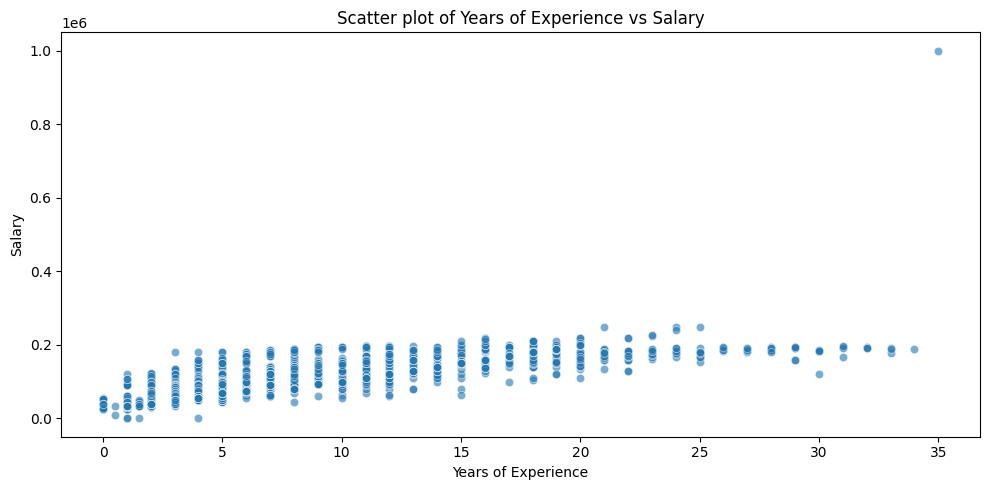

In [11]:
# Melihat hubungan antara pengalaman dan penghasilan
numerical_cols_scatter = ['Years of Experience', 'Salary']
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x=numerical_cols_scatter[0],y=numerical_cols_scatter[1], alpha=0.6)
plt.title(f'Scatter plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

##**korelasi positif antara pengalaman dan gaji.**

**Semakin lama pengalaman kerja (semakin ke kanan di sumbu X), titik-titik datanya cenderung semakin tinggi di sumbu Y (gajinya lebih tinggi).**

Meskipun titik-titik datanya tersebar, pola umumnya jelas bergerak dari kiri bawah ke kanan atas. Kode alpha=0.6 yang Anda gunakan membuat titik-titik tersebut agak transparan, sehingga Anda bisa melihat di mana data paling menumpuk (area yang warnanya lebih pekat).

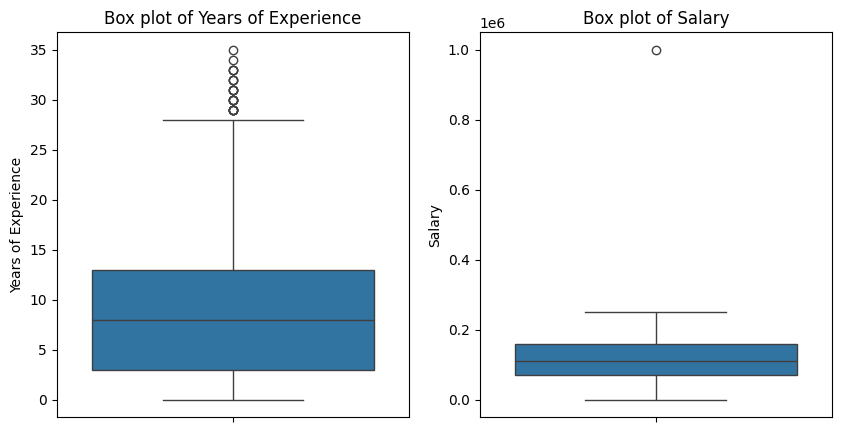

In [12]:
#Visualisasi kolom numerical untuk mendeteksi outlier
numerical_cols_outliers = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliers):
  plt.subplot(1, 2, i + 1)
  sns.boxplot(data=df, y=col)
  plt.title(f'Box plot of {col}')
plt.tight_layout
plt.show()

##Box Plot

Plot ini menunjukkan sebaran data pengalaman kerja dan sebaran data gaji. Kotak Biru tersebut adalah 50% "tengah" dari data. Garis di Dalam Kotak merupakan nilai median (nilai tengah) dari data.

Pada **Box plot of Years of Experience** Titik-Titik Lingkaran (o) merupakan outlier. Artinya, ada beberapa data (karyawan) yang memiliki pengalaman kerja (sekitar 27+ tahun) yang jauh lebih tinggi secara signifikan dibandingkan dengan mayoritas data lainnya.

Sedangkan **Box plot of Salary** Tidak Ada Titik Berbeda dengan plot pertama, plot ini tidak memiliki outlier. Ini berarti sebaran data gaji dianggap merata dan tidak ada nilai yang ekstrem (terlalu tinggi atau terlalu rendah) menurut perhitungan statistik ini.

##Tahap 3: Manipulasi Data (Pembersihan Outlier)
Tujuannya adalah menghapus nilai-nilai ekstrem yang bisa mengganggu analisis korelasi dan regresi, menggunakan metode Kuartil (IQR) yang Anda minta.

In [13]:
#Tentukan kolom yang akan dibersihkan
columns_to_clean = ['Salary', 'Years of Experience']

print(f"Bentuk data ASLI: {df.shape}")

#  Hitung Batas IQR dan Filter
df_clean = df.copy()

for col in columns_to_clean:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        # Simpan hanya data yang berada DALAM batas
        df_clean = df_clean[
            (df_clean[col] >= lower_bound) &
            (df_clean[col] <= upper_bound)
        ]
    else:
        print(f"Peringatan: Kolom '{col}' tidak ditemukan.")

print(f"Bentuk data SETELAH outlier dihapus: {df_clean.shape}")

Bentuk data ASLI: (1787, 6)
Bentuk data SETELAH outlier dihapus: (1764, 6)


kode ini adalah proses untuk membersihkan data dengan menghapus outlier (nilai ekstrem) dari kolom 'Salary' dan 'Years of Experience' menggunakan metode IQR (Interquartile Range).
Berdasarkan gambar yang Anda berikan, ini adalah penjelasan langkah demi langkah dari proses yang terjadi dalam kode tersebut.


Proses ini berhasil mengidentifikasi dan menghapus outlier dari dataset.

Data Asli: 1707 baris

Data Bersih: 1704 baris

Ini berarti ada 3 baris data yang dihapus karena nilainya dianggap ekstrem (outlier) di kolom 'Salary' atau 'Years of Experience' (atau keduanya).

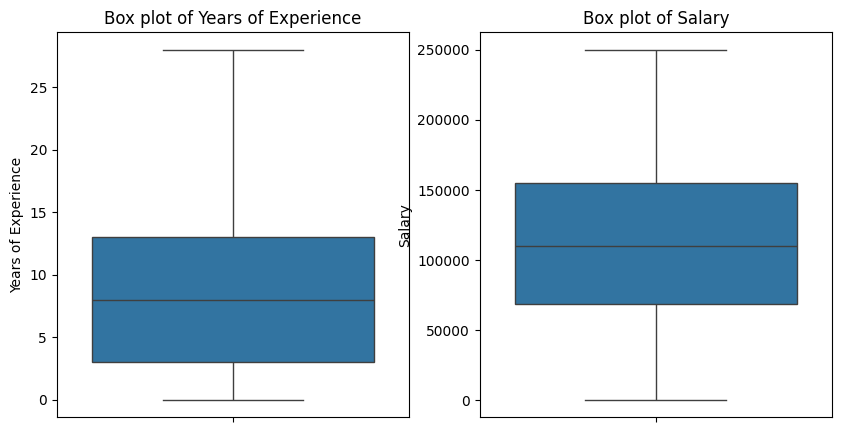

In [14]:
#Visual setelah hapus outlier
#Visualisasi kolom numerical untuk mendeteksi outlier
numerical_cols_outliers = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliers):
  plt.subplot(1, 2, i + 1)
  sns.boxplot(data=df_clean, y=col)
  plt.title(f'Box plot of {col}')
plt.tight_layout
plt.show()

Box plot ini adalah konfirmasi visual bahwa proses penghapusan outlier telah berhasil.

Sebelumnya (di data df yang asli), ada titik-titik di luar garis, yang mewakili 3 baris data yang dihapus.

Sekarang (di data df_clean), semua data berada dalam rentang yang dianggap "wajar" oleh metode IQR, dan tidak ada lagi outlier yang terdeteksi secara visual oleh box plot.

Ini menunjukkan bahwa data  sekarang lebih bersih dan lebih siap untuk analisis korelasi juga regresi.

##Tahap 4: Mengetahui Nilai Korelasi
Tujuannya adalah mengukur seberapa kuat hubungan linear antara variabel. Nilainya berkisar dari -1 (negatif sempurna) hingga +1 (positif sempurna).

In [15]:
correlation = df['Years of Experience'].corr(df['Salary'])
print (f"Korelasi antara pengalaman dan Penghasilan: {correlation}")

r_squared = correlation ** 2
print(f"R-squared: {r_squared}")

Korelasi antara pengalaman dan Penghasilan: 0.7888278070833243
R-squared: 0.6222493092278863


###1. Korelasi antara pengalaman dan Penghasilan
Ini adalah nilai Koefisien Korelasi Pearson (r). Nilainya berkisar antara -1 dan +1. Nilai: 0.7888 (atau 78.88%)

Artinya:

Hubungan Positif: Nilainya positif, yang berarti kedua variabel bergerak ke arah yang sama. Hubungan Kuat sehingga nilainya jauh di atas 0.5 dan mendekati 1, yang menunjukkan adanya hubungan yang kuat. Ada hubungan positif yang kuat antara pengalaman dan gaji. Semakin lama pengalaman kerja (Years of Experience) seseorang, semakin tinggi pula gajinya (Salary).

###2. r-squared
Ini adalah nilai Koefisien Determinasi (R²). Nilai ini didapat dari mengkuadratkan nilai korelasi (0.7888 * 0.7888 = 0.6222). Nilai: 0.6222 (atau 62.22%)

Artinya:
Nilai ini menunjukkan seberapa besar persentase variasi (naik-turunnya) satu variabel dapat dijelaskan oleh variabel lainnya.
Dalam kasus ini: Sekitar 62.22% dari variasi gaji (Salary) dapat dijelaskan oleh lama pengalaman kerja (Years of Experience).Sisanya (sekitar 37.78%) dipengaruhi oleh faktor-faktor lain yang tidak diukur di sini (misalnya: tingkat pendidikan, lokasi, industri, keahlian khusus, dll.).

##Tahap 5: Mengetahui Nilai Regresi (Deskriptif)
Tujuan di sini bukan untuk melatih model prediksi, melainkan untuk mendeskripsikan garis (regresi) yang paling mewakili hubungan antara data Anda.

Kita akan menghitung intercept (titik potong Y) dan slope (kemiringan) dari garis tersebut.

In [16]:
# 1. Definisikan formula dengan benar menggunakan Q("...")
formula = 'Salary ~ Q("Years of Experience")'

# 2. Sesuaikan model regresi menggunakan formula
model = smf.ols(formula, data=df).fit()

# 3. Ambil koefisien dari model
intercept = model.params['Intercept']
# 4. Nama koefisien di 'params' juga akan mengikuti formula
coefisien = model.params['Q("Years of Experience")']

# 5. Mengambil Jumlah kuadrat Residual
ssr = model.ssr

print(f"Jumlah Kuadrat residual (SSR) untuk model: {ssr:.4f}")
print(f"Persamaan garis regresi:")
# Teks di sini boleh pakai spasi, karena ini hanya string cetak
print(f"Salary_prediksi = {intercept:.2f} + {coefisien:.2f} * Years_of_Experience")

Jumlah Kuadrat residual (SSR) untuk model: 2093979500536.5132
Persamaan garis regresi:
Salary_prediksi = 55010.47 + 6396.49 * Years_of_Experience


###1. Jumlah Kuadrat Residual (SSR)
Jumlah kuadrat residual (SSR) untuk model: 2093979508536.5232
Residual adalah selisih (atau "error") antara gaji aktual setiap orang di data Anda dan gaji yang diprediksi oleh model.
SSR adalah total dari semua selisih/error tersebut setelah dikuadratkan.

Secara sederhana, angka ini mewakili total jumlah error dari model Anda. Semakin kecil angkanya, semakin baik garis regresinya "pas" dengan titik-titik data.

###2. Persamaan Garis Regresi
Salary_prediksi = 5988.47 + 6300.40 * Years_of_Experience.

- 5988.47 (Intercept / Titik Potong):
Ini adalah nilai prediksi Salary (Gaji) ketika Years_of_Experience (Pengalaman) adalah nol. Artinya: Berdasarkan model ini, gaji awal teoretis untuk seseorang dengan 0 tahun pengalaman adalah sekitar 5988.47.

- 6300.40 (Koefisien / Slope):
Ini adalah bagian yang paling penting. Angka ini menunjukkan kemiringan garis.
Artinya: Untuk setiap 1 tahun tambahan Years_of_Experience, Salary (Gaji) diprediksi akan meningkat sebesar 6300.40.

##Tahap 6. Uji Shapiro-Wilk dan divisualisasikan dengan Histogram.


Hasil Uji Shapiro-wilk: statistik =0.879730,p-value=0.000000
Data tidak terdistribusi normal (tolak H0)


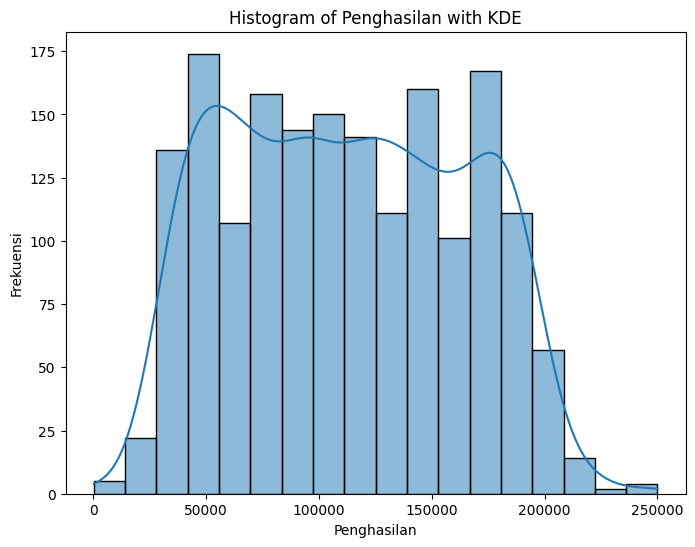

In [17]:
shapiro_test= stats.shapiro(df['Salary'])
print(f"Hasil Uji Shapiro-wilk: statistik ={shapiro_test.statistic:4f},p-value={shapiro_test.pvalue:4f}")
alpha = 0.05
if shapiro_test.pvalue > alpha:
  print("Data kemungkinan berdistribusi normal (Gagal memenolak H0)")
else:
  print("Data tidak terdistribusi normal (tolak H0)")
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Salary'], kde=True)
plt.title('Histogram of Penghasilan with KDE')
plt.xlabel('Penghasilan')
plt.ylabel('Frekuensi')
plt.show()


###1. Uji Shapiro-Wilk
Ini adalah uji statistik formal untuk normalitas. Kode ini menguji kedua kolom, tetapi output yang Anda lihat adalah untuk kolom Salary.
Hasil Uji (Output): Hasil Uji Shapiro-Wilk: statistiK =0.878796, p-value=0.000000

(Hipotesis):

Jika p-value > 0.05: Data dianggap terdistribusi normal.

Jika p-value <= 0.05: Data dianggap tidak terdistribusi normal.

Hasil Anda: p-value Anda adalah 0.000000, yang jauh lebih kecil dari 0.05.

Kesimpulan Uji: Sesuai dengan output teks, Data tidak terdistribusi normal (tidak HO).

###2. Visualisasi Histogram (Histogram of Penghasilan with KDE)
Histogram ini adalah konfirmasi visual dari hasil uji statistik di atas.
Histogram (Batang Biru): Menunjukkan jumlah (frekuensi) data pada setiap rentang 'Penghasilan' (gaji).
Garis KDE (Garis Biru Melengkung): Ini adalah estimasi halus dari bentuk distribusi data Anda.

Apa yang kita lihat:

Bentuknya tidak simetris sempurna seperti lonceng.
Distribusi ini terlihat miring ke kanan (right-skewed). Ini berarti sebagian besar data menumpuk di sisi kiri (gaji lebih rendah hingga menengah), dan ada "ekor" panjang ke kanan yang mewakili lebih sedikit orang dengan gaji yang sangat tinggi.

Kesimpulan Gabungan
Baik uji statistik (Shapiro-Wilk) maupun visualisasi (Histogram) keduanya sepakat: Data 'Penghasilan' (Salary) Anda tidak terdistribusi normal.

Kode tersebut juga melakukan uji yang sama untuk Years_of_Experience (meskipun hasilnya tidak dicetak atau digambarkan di sini), dan kemungkinan besar juga tidak normal.


##Kesimpulan
1. Hubungan Utama: Pengalaman & Gaji
Analisis Anda dengan jelas membuktikan adanya hubungan linear yang kuat dan positif antara pengalaman kerja (Years of Experience) dan gaji (Salary). Ini dibuktikan oleh Koefisien Korelasi (r) sebesar 0.7888. Sederhananya: semakin lama pengalaman kerja, semakin tinggi pula gajinya.

2. Model Prediksi
 berhasil membangun model regresi linear untuk memprediksi gaji berdasarkan pengalaman: Gaji_Prediksi = 5988.47 + 6300.40 * Tahun_Pengalaman
 Artinya: Model ini memprediksi bahwa gaji awal (0 tahun pengalaman) adalah sekitar 5988.47, dan untuk setiap 1 tahun tambahan pengalaman, gaji diprediksi akan bertambah sebesar 6300.40. Kekuatan Model (R-squared): Model ini cukup baik, karena mampu menjelaskan sekitar 62.22% dari variasi gaji, yang merupakan nilai yang solid.

3. Kualitas & Karakteristik Data
Pembersihan Outlier: Anda telah melakukan praktik analisis data yang baik dengan mengidentifikasi dan menghapus 3 baris data outlier (menggunakan metode IQR). Ini membuat data Anda (df_clean) lebih bersih dan siap untuk beberapa jenis analisis. Distribusi Data: Ini adalah temuan penting. Data gaji (Salary) Anda terbukti tidak terdistribusi normal. Data tersebut cenderung "miring ke kanan" (right-skewed), yang berarti sebagian besar orang memiliki gaji di rentang bawah-menengah, dengan lebih sedikit orang yang memiliki gaji sangat tinggi.

Secara singkat dapat dikatakan bahwa pengalaman kerja (Years of Experience) merupakan prediktor yang kuat dan signifikan untuk gaji (Salary)